# Bruk av Euler-Cromer-metoden og bli kjent med SciPy-biblioteket

### TFY4163 Fluidmekanikk og bølgefysikk – Programmeringsøving 2

**Forkunnskaper:** Introduksjon til SciPy-notebooken og Euler-metoden. 

**Læringsmål:** Løse andreordens ODE ved Euler-Cromer-metoden. Bli kjent med SciPy-biblioteket, og benytte en funksjon fra integrate pakken for å løse ODE. 

------------------------

I programmeringsøving 1 ble Euler-metoden brukt til å finne en løsning av bevegelsesligningen for en enkel harmonisk pendel. Vi observerte da at vinkelutslaget, og derfor energien, økte raskt med tiden. Vi må derfor forbedre vår numeriske metode for å få en fysisk løsning.

Til dette skal vi benytte Euler-Cromer metoden (ofte også kalt semi-implisitt Euler-metode). Metoden er basert på en enkel modifikasjon av Euler metoden. Vi bruker de *gamle* verdiene, $\theta_i$ for å beregne vinkelhastigheten $\omega_{i+1}$, men den *oppdaterte* verdien, $\omega_{i+1}$, for å beregne vinkelen, $\theta_{i+1}$.

Bevegelsesligningen (som ble utledet i programmeringsøving 1) er


$$\frac{d^2 \theta}{d t^2} = - \frac{g}{l} \sin \theta,$$ 

hvor $\theta$ er vinkelutslaget til snora med hensyn til vertikalen, $g$ er tyngdeakselerasjonen og $l$ er lengden av snora.

## Oppgave 1 – Løsning av bevegelsesligningen ved Euler-Cromer metoden 

Parametrene og initialbetingelsene til pendelen

- Lengden av snora, $l = 1.0$ m
- Masse, $m = 5$ kg
- Tyngdeakselerasjonen, $g = 9.8 \: \text{m}/\text{s}^2$ 
- Startvinkel til snora med hensyn til vertikalen, $\theta_0 = 0.2$ rad
- Vinkelhastighetens startverdi, $\omega_0 = 0.0$ rad/s

**a)** Lag en funksjon hvor du beregner vinkelutslaget, $\theta$, og vinkelhastigheten, $\omega$, ved å bruke Euler-Cromer metoden. Anta også her at $\sin \theta \approx \theta$ (lite vinkelutslag).

In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
l = 1 # m
m = 5 # kg
g = 9.81 # m/sˆ2

In [100]:
# Husk å definere nødvendige biblioteker

# Definer konstanter og initialbetingelser

# For å plotte i notebooken
%matplotlib inline

def euler_cromer_approx(theta_0, w_0, dt, T):

    """
    Calculates angular displacement and angular velocity using the Euler-Cromer method
    
    PARAMETERS:
    -----------
    theta_0: initial angular displacement 
    w_0: initial angular velocity
    dt: timestep
    T: max t
    
    
    RETURNS:
    --------
    theta: array with values of angular displacement
    w: array with values of angular velocity
    t: array with time-values
    """
    
    # SKRIV KODE HER
    
    

    #N = int(T/dt)

    N = int(T/0.001)

    w = np.zeros(N)
    theta = np.zeros(N)
    t = np.linspace(0, T, N)
    
    w[0] = w_0
    theta[0] = theta_0
    
    for i in range(0, N-1):
        w[i+1] = w[i] - (g/l) * theta[i] * dt # next omega
        theta[i+1] = theta[i] + w[i+1] * dt # next theta

    return theta, w, t


**b)** Vi skal nå undersøke hvor stabil Euler-Cromer metoden er for vårt system.

1. Plot vinkelutslaget, $\theta$, som funksjon av tid, $t$, opp til $t = 10$ s. Bruk tidssteg $\Delta t = 0.007$ s. Observer at amplituden til vinkelutslaget *ikke* endrer seg med tid slik den gjorde med Euler-metoden i programmeringsøvingøving 1 (oppgave 2c). Euler-Cromer metoden er derfor en forbedring over Euler metoden da vi har konstant total energi.

2. Benytt funksjonen `energy_calculation` fra programmeringsøving 1 (oppgave 2b), og bytt ut  `euler_method` med `euler_cromer_approx`. Plot den totale energien til pendelen som funksjon av tid, for tidssteg $\Delta t = 0.001$ s, $\Delta t = 0.004$ s og $\Delta t = 0.007$ s. Husk å inkludere `label` for plottene, og `legend` for figuren. Du vil nå observere at den totale energien varierer periodisk, men er konservert for en *periode*,
$2 \pi \sqrt{l/g}$. Videre vil du observere at hvor mye energien varierer over en periode minker med tidssteget. 

5. Beregn energidifferansen mellom slutten og starten av en periode for $\Delta t = 0.001$ s. *Hint:* Plot for tid opp til $t = 2 \pi \sqrt{l/g}$, slik at det siste elementet i arrayen er ved fullført periode. Du kan aksessere siste element i en array, `a`, med `a[-1]`.

In [101]:
# SKRIV KODE HER

theta_1, omega_1, t_1 = euler_cromer_approx(0.2, 0, 0.001, 10)
theta_4, omega_4, t_4 = euler_cromer_approx(0.2, 0, 0.004, 10)
theta_7, omega_7, t_7 = euler_cromer_approx(0.2, 0, 0.007, 10)

**c)** Vi går nå bort fra tilnærmelsen $\sin \theta = \theta$, slik at bevegelsesligningen for pendelen er gitt ved

\begin{equation}
 	\frac{d^2 \theta}{d t^2} = - \frac{g}{l} \sin \theta.
	\label{bevegelse}
\end{equation}

Denne differensialligningen, som er ikke-lineær, kan ikke løses analytisk, og vi *må* derfor benytte numeriske metoder. Det er viktig å merke seg at svært mangle ligninger man kommer fram til i fysikken ikke har analytiske løsninger, og det er derfor nyttig å kunne numeriske metoder for å tilnærme løsningene. 

1. Skriv en funksjon som beregner vinkelutslaget, $\theta$, og vinkelhastigheten, $\omega$, som funksjon av tid ved bruk av Euler-Cromer metoden. *Hint:* Kun en liten endring av koden er nødvendig.


2. Plot vinkelutslaget funnet med liten vinkel tilnærmelsen sammen med vinkelutslaget som beregner fra funksjonen over, for initialvinkel $\theta_0 = 15^\circ$ og $\theta_0 = 40^\circ$. Benytt tidssteg $\Delta t = 0.001$ s. Prøv deg gjerne fram med forskjellige vinkler, og observer for hvilke startvinkler det ser ut som at liten vinkel tilnærmelsen er rimelig å benytte. *Tips:* Bruk funksjonen `np.radians` for å konvertere fra grader til radianer.
 
 

In [102]:
# SKRIV KODE HER
df = pd.DataFrame({
    't_1': t_1,
    "theta_1": theta_1,
    "omega_1": omega_1,
    't_4': t_4,
    "theta_4": theta_4,
    "omega_4": omega_4,
    't_7': t_7,
    "theta_7": theta_7,
    "omega_7": omega_7,
})

times = [1, 4, 7]
for i in times:
    df[f'energy_{i}'] = 0.5 * m * l * (l* df[f'omega_{i}']**2 + df[f'theta_{i}']**2)
df

,t_1,theta_1,omega_1,t_4,theta_4,omega_4,t_7,theta_7,omega_7,energy_1,energy_4,energy_7
0,0.000,0.200000,0.000000,0.000,0.200000,0.000000,0.000,0.200000,0.000000,0.100000,0.100000,0.100000
1,0.001,0.199998,-0.001962,0.001,0.199969,-0.007848,0.001,0.199904,-0.013734,0.100008,0.100123,0.100375
2,0.002,0.199994,-0.003924,0.002,0.199906,-0.015695,0.002,0.199712,-0.027461,0.100033,0.100522,0.101597
3,0.003,0.199988,-0.005886,0.003,0.199812,-0.023539,0.003,0.199423,-0.041176,0.100075,0.101197,0.103663
4,0.004,0.199980,-0.007848,0.004,0.199686,-0.031380,0.004,0.199039,-0.054870,0.100134,0.102148,0.106568
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9.996,0.198811,0.069175,9.996,0.181328,0.267870,9.996,0.145070,0.436225,0.110778,0.261586,0.528344
9996,9.997,0.198879,0.067224,9.997,0.182371,0.260755,9.997,0.148053,0.426263,0.110180,0.253131,0.509051
9997,9.998,0.198944,0.065273,9.998,0.183386,0.253599,9.998,0.150966,0.416097,0.109598,0.244856,0.489818
9998,9.999,0.199007,0.063322,9.999,0.184371,0.246403,9.999,0.153806,0.405730,0.109034,0.236767,0.470682


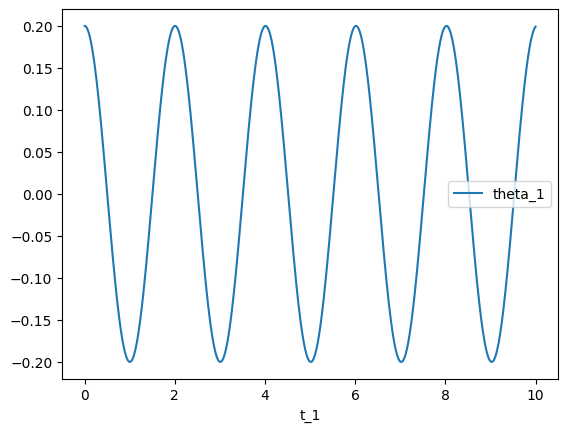

In [107]:
df.plot(x = 't_1', y = 'theta_1')

plt.show()

In [111]:
def euler_cromer_approx_new(theta_0, w_0, dt, T):

    """
    Calculates angular displacement and angular velocity using the Euler-Cromer method
    
    PARAMETERS:
    -----------
    theta_0: initial angular displacement 
    w_0: initial angular velocity
    dt: timestep
    T: max t
    
    
    RETURNS:
    --------
    theta: array with values of angular displacement
    w: array with values of angular velocity
    t: array with time-values
    """
    
    # SKRIV KODE HER
    
    

    #N = int(T/dt)

    N = int(T/0.001)

    w = np.zeros(N)
    theta = np.zeros(N)
    t = np.linspace(0, T, N)
    
    w[0] = w_0
    theta[0] = theta_0
    
    for i in range(0, N-1):
        w[i+1] = w[i] - (g/l) * np.sin(theta[i]) * dt # next omega
        theta[i+1] = theta[i] + w[i+1] * dt # next theta

    return theta, w, t

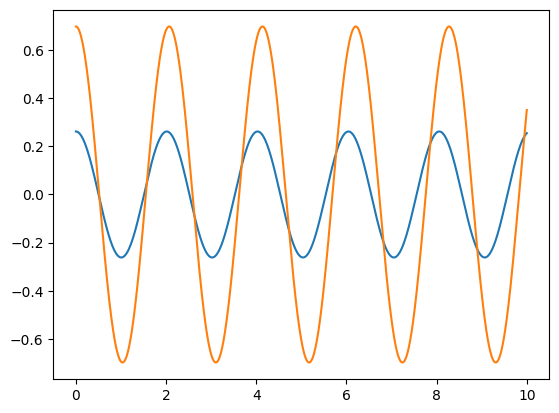

In [115]:
new_theta_15, new_omega_15, new_t_15 = euler_cromer_approx_new(np.radians(15), 0, 0.001, 10)
new_theta_40, new_omega_40, new_t_40 = euler_cromer_approx_new(np.radians(40), 0, 0.001, 10)

plt.plot(new_t_15, new_theta_15, label = "sinø = ø")
plt.plot(new_t_40, new_theta_40, label = "sinø != ø")

##  Oppgave 2 – Bruk av SciPy biblioteket

Vi skal nå bruke funksjonen `scipy.integrate.solve_ivp` fra SciPy-biblioteket for å finne løsning til bevegelsesligningen for pendelen (som er en andreordens ordinær differensialligning). Når man skal bruke en ny funksjon for første gang så må man lese gjennom funksjons-dokumentasjonen, sånn at man skjønner hvordan funksjonen brukes. Les derfor gjennom notebooken "Introduksjon til SciPy" som ligger på BlackBoard under "Numeriske øvinger". **Det er viktig at du har lest nøye gjennom denne, og forstår eksempelet gitt der.**

`scipy.integrate.solve_ivp` bruker Runge-Kutta 5(4)-metoden (ofte forkortet RK45) som standard, noe vi også skal bruke i denne oppgaven. Denne metoden er en såkalt *adaptiv metode* med varierende tidssteg. Kort fortalt bruker metoden to ulike ODE-løsere (4. og 5. ordens Runge-Kutta [se programmeringsøving 3]) til å beregne usikkerheten til hvert steg. Steglengden justeres slik at ønsket usikkerhet blir oppnådd. Dermed bruker man korte steglengder kun når det er nødvendig. Dere lærer mer om dette i faget TMA4320 Introduksjon til vitenskapelige beregninger. De som er interesserte kan ta en titt på notebooken [Adaptive Runge-Kutta Method](https://nbviewer.jupyter.org/urls/www.numfys.net/media/notebooks/adaptive_runge_kutta_methods.ipynb) for å lære mer om prinsippet.

I eksemplene fra dokumentasjonen er det vist hvordan man finner løsning for en førsteordens ordinær differensialligning (ODE). Bevegelsesligningen for den enkle harmoniske pendelbevegelsen er en *andreordens ODE*. Vi må derfor løse ett ligningssystem av *to* ODE-er. 

**a)** Lag en funksjon som tar inn en float `t`, og et array `vals`, og returnerer et array av de to verdiene til høyresiden av de to ODE-ene for den harmonsike pendelen (uten å anta lite vinkelutslag). Det er gitt funksjonsdeklarasjon, input parametre og hva som skal returneres i funksjonen under. *Hint:* Skriv først bevegelsesligningen for pendelen som to førsteordens ODE-er (slik som ble gjort i programmeringsøving 1). 


In [116]:
def equation(t, vals):
    """
    Calculates the value of RHS of the differentail equations given an array (vals) which 
    contains the values of the parameters

    Parameters
    -----------
    t: float. time
    vals: array. values of theta and omega, [theta, omega] 
    
    Returns
    -------
    array with values of the RHS of the equations.
    """
    
    # SKRIV KODE HER
    dtheta = vals[0]
    dw = -(g/l)*np.sin(vals[0])

    return [dtheta, dw]

"""
Note:
scipy.integrate.solve_ivp requires that fun returns
an object which is of type array_like. 
An ordinary list is of this type (as well as e.g. integers, floats and numpy arrays)
so we can return a list, and do not have to first convert into an np.array. 
"""

'\nNote:\nscipy.integrate.solve_ivp requires that fun returns\nan object which is of type array_like. \nAn ordinary list is of this type (as well as e.g. integers, floats and numpy arrays)\nso we can return a list, and do not have to first convert into an np.array. \n'

**b)** Lag en funksjon som benytter `scipy.integrate.solve_ivp` for å beregne vinkelutslaget, $\theta$ og vinkelhastigheten, $\omega$. Funksjonen skal også returnere en array med tidsverdier. Plot vinkelutslaget som funksjon av tid, opp til $t = 10$ s. Sett $\theta_0 = 0.2$ rad, og $\omega_0 = 0.0$ rad/s. Bruk tidssteg $\Delta t = 0.01$.

In [106]:
def RK45_method(RHS, theta_0, w_0, t_1, dt):
    """
    Calculates theta and omega using the scipy.integrate.solve_ivp function (RK54)
    
    RHS: right hand side of differential equations
    t_1: time-value to calculate up to (e.g. 10 seconds)
    dt: timestep
    
    Returns
    -------
    theta: array of theta values
    w: array of omega values
    t: timevalues
    """
    
    # SKRIV KODE HER
    
    return theta, w, t

# PLOT VINKELUTSLAGET